In [1]:
#! pip install -U scikit-image

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import io
%matplotlib inline

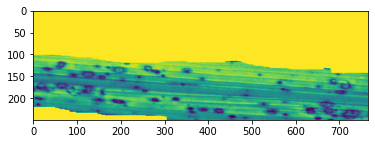

In [3]:
path = r'data\Brown spot\DSC_0100.jpg'
image = io.imread(path, as_gray=True)
type(image), image.shape
plt.imshow(image)

In [4]:
type(image)

numpy.ndarray

In [5]:
image.shape

(250, 766)

In [6]:
image.shape[0]*image.shape[1]

191500

In [7]:
from skimage.transform import rescale, resize


In [8]:
# Scaling
scaledimg = rescale(image, 0.5)
image.shape, scaledimg.shape

((250, 766), (125, 383))

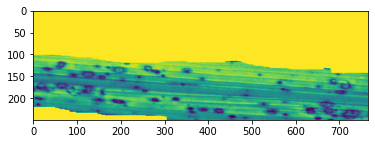

In [9]:
plt.imshow(image)

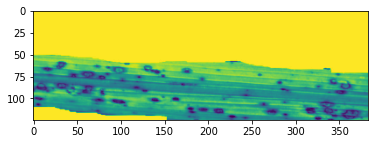

In [10]:
plt.imshow(scaledimg)

In [11]:
import os
os.getcwd()
os.listdir('data')

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

In [ ]:
os.listdir('data\Brown spot')

In [13]:
# Transformation
class Transformation:
    def __init__(self, dirs :list[str]) -> None:
        self.from_path = 'data'
        self.to_path = 'processed_data'
        self.dirs = dirs
        self.cls = {dirs[i]: i for i in range(len(dirs))}
        self.images_path = [
            (f'data\\{dir}\\{img}',f'processed_data\\{img.split(".")[0]}_{self.cls[dir]}.{img.split(".")[1]}') for dir in self.dirs for img in os.listdir(f'data\\{dir}')]
        print(len(self.images_path))

    def transformation(self):
        for img, pimg in self.images_path:
            image = io.imread(img, as_gray= True)
            scimage = rescale(image, 1/2)
            resized_img = resize(scimage, (228,228))
            io.imsave(pimg, resized_img)
        return True
            


    
        


In [ ]:
for dir in ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']:
    #print(f'data\\{dir}')
    for img in os.listdir(f'data\\{dir}'):
        img_path = img.split('.')
        img_path = img_path[0]+f'_0.'+img_path[1]

        print((f'data\\{dir}\\{img}', f'processed_data\\{dir}\\{img_path}'))

In [48]:
tf_img = Transformation(['Bacterial leaf blight','Brown spot', 'Leaf smut'])

120


In [ ]:
tf_img.transformation()

Data Modelling

In [39]:
import warnings
warnings.filterwarnings(action='ignore')

In [51]:
images = []
labels = []
for  _ , pimg in tf_img.images_path:
    image = io.imread(pimg).ravel()/255
    label = int(pimg.split('.')[0][-1])
    images.append(image)
    labels.append(label)

In [ ]:
images = []
labels = []
for _ , pimg in tf_img.images_path:  # _ indicates that we need only the 2nd path of images_path, 1st is not needed
    image = io.imread(pimg).ravel()/255  # showing the processed img
    label = int((pimg.split('.')[0][-1]))
    plt.imshow(image)
    images.append(image)
    labels.append(label)


In [36]:
images[0]

[array([[217, 216, 216, ..., 217, 217, 217],
        [217, 216, 216, ..., 217, 217, 217],
        [217, 216, 216, ..., 217, 217, 217],
        ...,
        [217, 217, 217, ..., 217, 217, 217],
        [217, 217, 217, ..., 217, 217, 217],
        [217, 217, 217, ..., 217, 217, 217]], dtype=uint8),
 0]

In [40]:
np_image = np.array(images)  # we have to convert into np array

In [41]:
np_image[0]

array([array([[217, 216, 216, ..., 217, 217, 217],
              [217, 216, 216, ..., 217, 217, 217],
              [217, 216, 216, ..., 217, 217, 217],
              ...,
              [217, 217, 217, ..., 217, 217, 217],
              [217, 217, 217, ..., 217, 217, 217],
              [217, 217, 217, ..., 217, 217, 217]], dtype=uint8), 0],
      dtype=object)

In [ ]:
np_image[:, 0]  # x values, all images

In [ ]:
np_image[:, 1]  # y values, labels

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=1)


In [54]:
#xtrain = np.array(x_train)
#xtrain[0]   # provides same result

array([0.90588235, 0.90588235, 0.90588235, ..., 0.89411765, 0.89411765,
       0.89803922])

In [58]:
xtrain = np.array([image for image in x_train])
ytrain = np.array(y_train)
xtrain[0]

array([0.90588235, 0.90588235, 0.90588235, ..., 0.89411765, 0.89411765,
       0.89803922])

LOGISTIC REGRESSION

In [59]:
from sklearn.linear_model import LogisticRegression
lgmodel = LogisticRegression()
lgmodel.fit(xtrain, ytrain)

LogisticRegression()

In [63]:
xtest = np.array([image for image in x_test])
ytest = np.array(y_test)
ypred = lgmodel.predict(xtest)
ypred == ytest

array([False,  True, False, False, False, False, False, False, False,
        True,  True, False, False,  True, False,  True, False, False,
        True,  True, False, False, False, False])

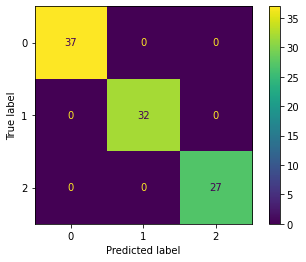

In [66]:
from sklearn.metrics import f1_score, plot_confusion_matrix, accuracy_score
plot_confusion_matrix(lgmodel, xtrain, ytrain)

In [68]:
f1_score(ypred, ytest, average= 'weighted')

0.29633867276887876

In [70]:
accuracy_score( ypred, ytest)

0.2916666666666667

SVM


In [71]:
from sklearn.svm import SVC
svmmodel = SVC(kernel= 'poly', random_state=4)
svmmodel.fit(xtrain, ytrain)

SVC(kernel='poly', random_state=4)

In [72]:
ypred = svmmodel.predict(xtest)
ypred == ytest

array([False,  True,  True,  True, False,  True, False, False,  True,
        True,  True, False, False,  True,  True, False,  True, False,
        True,  True, False, False, False,  True])

In [74]:
f1_score(ypred, ytest, average='weighted')

0.5386363636363636

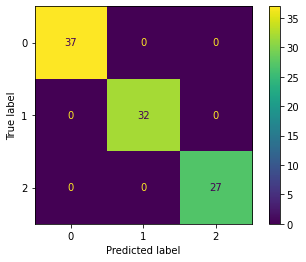

In [75]:
plot_confusion_matrix(svmmodel, xtrain, ytrain)

In [76]:
accuracy_score(y_test, ypred)

0.5416666666666666

In [77]:
from joblib import dump
dump(svmmodel, 'svmclassifier')

['svmclassifier']

In [80]:
images = []
labels = []
files = os.listdir(r'processed_data')
for  pimg in files:
    image = io.imread(f'processed_data\\{pimg}').ravel()/255
    label = int(pimg.split('.')[0][-1])
    images.append(image)
    labels.append(label)

In [ ]:
files = os.listdir(r'processed_data')
files

In [ ]:
files

In [87]:
images[0]

array([1.        , 1.        , 1.        , ..., 0.6745098 , 0.70196078,
       0.70196078])

In [88]:
Images = np.array([image for image in images])
Labels = np.array(labels)
Images[0]

array([1.        , 1.        , 1.        , ..., 0.6745098 , 0.70196078,
       0.70196078])

In [89]:
from joblib import load
model = load('svmclassifier')

In [91]:
ypred = model.predict(Images)
ypred == Labels

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [92]:
accuracy_score(ypred, ytest)

0.9083333333333333

In [94]:
f1_score(ypred, ytest, average='weighted')

0.9085004177109439

KNN

In [95]:
from sklearn.neighbors import KNeighborsClassifier
knmodel = KNeighborsClassifier(n_neighbors = 7)
knmodel.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=7)

In [96]:
xtest = np.array([image for image in x_test])
ytest = np.array(y_test)

In [97]:
ypred = knmodel.predict(xtest)
ypred == ytest

array([False,  True,  True,  True, False,  True,  True, False,  True,
        True,  True, False, False, False,  True,  True, False, False,
        True,  True, False, False, False, False])

In [99]:
f1_score(ypred, ytest, average = 'weighted')

0.5227631578947368

In [100]:
accuracy_score(ypred, ytest)

0.5

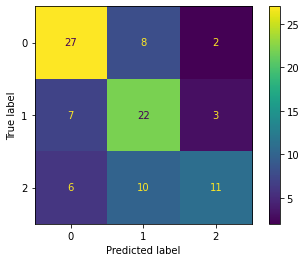

In [101]:
plot_confusion_matrix(knmodel, xtrain, ytrain)

In [109]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators=120)

In [110]:
rfmodel.fit(xtrain,ytrain)


RandomForestClassifier(n_estimators=120)

In [113]:
ypred = rfmodel.predict(xtest)
ypred == ytest


False

In [108]:
plot_confusion_matrix(rfmodel, xtest, ytest)

ValueError: Found input variables with inconsistent numbers of samples: [24, 96]